# Controlling figure aesthetics

绘制有吸引力的 figures 很重要。在为自己制作 figures 时，当您探索数据集时，很高兴看到令人愉快的 plot。可视化也是向观众传达定量见解的核心，在这种环境中，更有必要拥有吸引注意力和吸引观众的 figures。

Matplotlib高度可定制，但可能很难知道要调整哪些设置来实现有吸引力的 plot。Seaborn具有许多自定义主题和高级界面，用于控制 matplotlib figure的外观。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

让我们定义一个简单的函数来绘制一些  offset sine waves，这将帮助我们看到我们可以调整的不同风格参数。

In [2]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

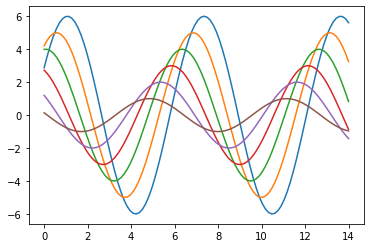

In [3]:
sinplot()

要切换到seaborn默认值，只需调用 `set_theme()` 函数。

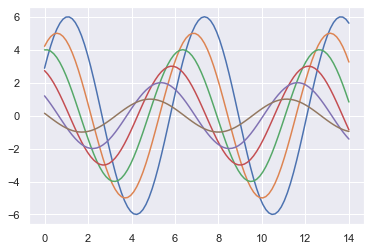

In [4]:
sns.set_theme()
sinplot()

（请注意，在0.8之前的seaborn版本中，`set_theme()` 在导入时被调用。在以后的版本中，必须显式调用它）。

Seaborn 将 matplotlib 参数分为两个独立的组。第一组设置了 plot 的审美风格，第二组 scales 了 figures 的各种元素，以便可以轻松地融入不同的上下文中。

操作这些参数的接口是两对函数。要控制风格，请使用 `axes_style()` 和 `set_style()` 函数。要scale plot，请使用 `plotting_context()` 和 `set_context()` 函数。在这两种情况下，第一个函数返回参数字典，第二个函数设置matplotlib 默认值。

## Seaborn figure styles

有五个预设的 seaborn 主题：`darkgrid`、`whitegrid`、`dark`、`white` 和 `ticks`。它们都适合不同的 applications 和个人偏好。默认主题是 `darkgrid`。如上所述，网格有助于绘制图作为定量信息的查找表，白色灰色有助于防止网格与代表数据的行竞争。`Whitegrid` 主题相似，但它更适合具有 heavy 数据元素的 plot：

<AxesSubplot:>

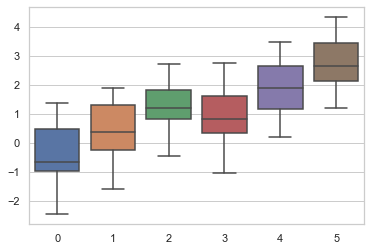

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

对于许多 plot，网格不太必要。

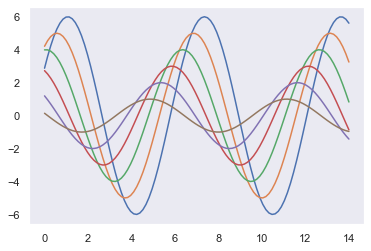

In [7]:
sns.set_style("dark")
sinplot()

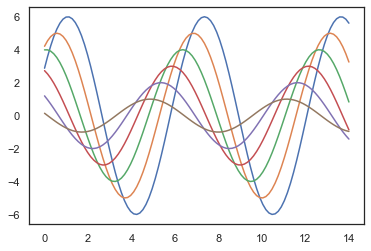

In [8]:
sns.set_style("white")
sinplot()

有时，你可能想给 plots 一点额外的结构，这就是 ticks 派上用场的地方：

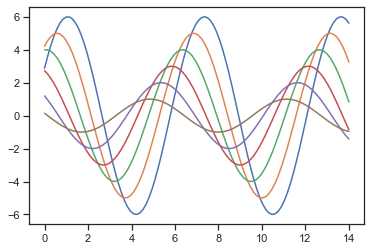

In [9]:
sns.set_style("ticks")
sinplot()

## Removing axes spines

`white` 和 `ticks` 风格都可以从去除不需要的 top 和  right axes spines。可以调用 seaborn 函数 `despine()` 来删除它们：

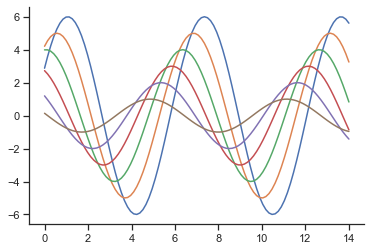

In [10]:
sinplot()
sns.despine()

一些绘图受益于从数据中 spines away ，这也可以在调用 `despine()` 时完成。当 ticks 没有覆盖整个轴范围时，`trim` 参数将限制 surviving spines 的范围。

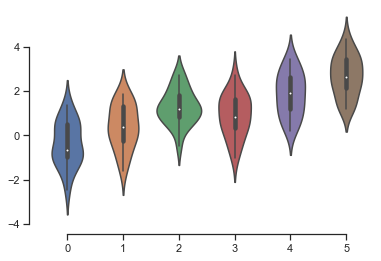

In [11]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True)

您还可以通过 `despine()` 的附加参数来控制哪些 spines 被删除：

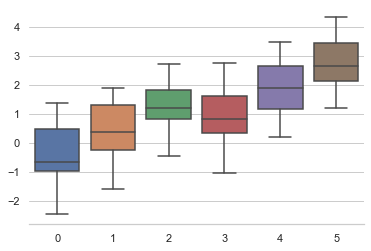

In [12]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

## Temporarily setting figure style

虽然来回切换很容易，但您也可以使用 `with` 语句中的 `axes_style()` 函数来临时设置绘图参数。这也允许您使用不同风格的 axes 制作 figures：

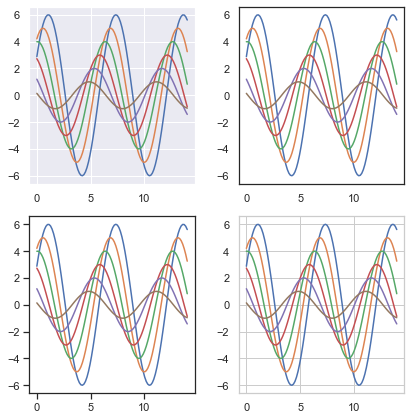

In [15]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()
    
with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()
    
with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()
    
f.tight_layout()

## Overriding elements of the seaborn styles

如果您想自定义 seaborn 风格，您可以将参数字典传递给 `axes_style()` 和 `set_style()` 的 `rc` 参数。请注意，您只能通过此方法覆盖风格定义的一部分参数。（然而，更高级别的 `set_theme()` 函数接受任何 matplotlib 参数的字典）。

如果您想查看包含哪些参数，只需调用没有参数的函数，这将返回当前设置：

In [16]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

然后，您可以设置这些参数的不同版本：

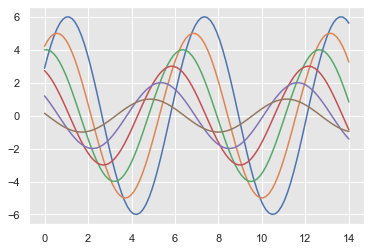

In [18]:
sns.set_style("darkgrid", {"axes.facecolor" : ".9"})
sinplot()

## Scaling plot elements

一组单独的参数控制绘图元素的 scale，这应该允许您使用相同的代码来制作适合在大小绘图的设置中使用的绘图。

首先，让我们通过调用 `set_theme()` 来重置默认参数：

In [19]:
sns.set_theme()

按相对大小排列的四个预设上下文是 `paper`、 `notebook`、`talk` 和 `poster`。 `notebook` 风格是默认的，并在上面的绘图中使用。

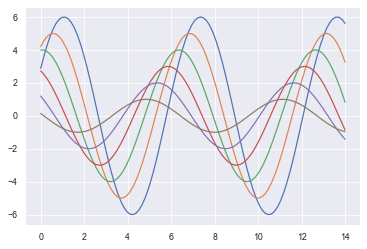

In [20]:
sns.set_context("paper")
sinplot()

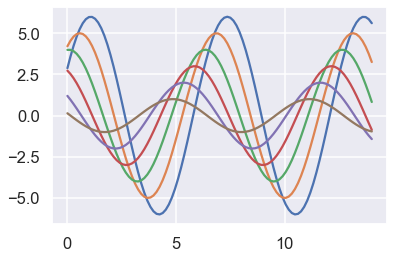

In [21]:
sns.set_context("talk")
sinplot()

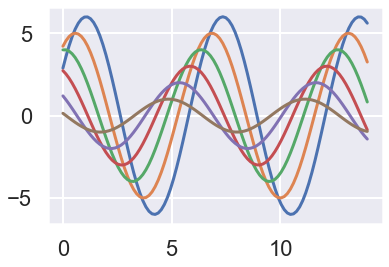

In [22]:
sns.set_context("poster")
sinplot()

您现在对风格函数的大部分了解应该转移到上下文函数。

您可以使用这些名字之一调用 `set_context()` 来设置参数，并且您可以通过提供参数值字典来覆盖参数。

您还可以在更改上下文时独立缩放字体元素的大小。（此选项也可以通过顶级 `set()` 函数获得）。

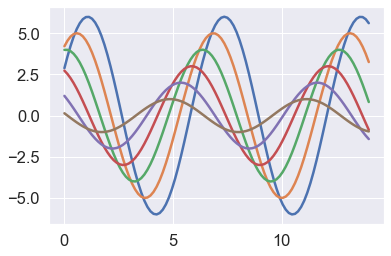

In [23]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

同样，您可以暂时控制嵌套在带 `with` 语句下的 figure scale。

style 和 context 都可以使用 `set()` 函数快速配置。此函数还设置了默认 color palette，但这将在教程的下一节中更详细地介绍。